In [2]:
import urllib.request
import matplotlib.pyplot as plt
import os
import pandas as pd
import zipfile

In [3]:
# move to working directory
#working_dir = "/Users/evan/MIT/c85/FP1"
working_dir = "/Users/evan/MIT/c85/FP1/school datasets/Residential sales transactions in City of Boston 2000-2023"
os.chdir(working_dir)

In [4]:
filelist = os.listdir()
#print(filelist)
data_file = 'boston_residential_sales.csv'
df = pd.read_csv(data_file)
#filelist[0]
df.columns


Index(['address', 'street', 'city', 'zip', 'proptype', 'date', 'year', 'price',
       'prsldate', 'prslpr', 'mortgage', 'usecode', 'usage', 'style',
       'yearbuilt', 'totrooms', 'bathrooms', 'bedrooms', 'lotsize', 'intersf',
       'lasqbin', 'amenity', 'lat', 'lon', 'cash_sale', 'buyer_llc_ind',
       'buyer_llp_ind', 'buyer_bus_ind', 'buyer_trst_ind', 'buyer_bnk_ind',
       'buyer_gse_ind', 'buyer_gov_ind', 'seller_llc_ind', 'seller_llp_ind',
       'seller_bus_ind', 'seller_trst_ind', 'seller_bnk_ind', 'seller_gse_ind',
       'seller_gov_ind', 'flip_horizon', 'flip_ind', 'buy_side_flip',
       'sell_side_flip', 'price_diff', 'price_diff_pch', 'month_horizon',
       'flip_term', 'buy_horizon', 'investor_type_purchase_count',
       'investor_type_sale_count', 'investor_type_purchase_llc',
       'investor_type_sale_llc', 'investor_type_purchase_building',
       'investor_type_sale_building', 'avg_annual_value',
       'investor_type_purchase_value', 'investor_type_sale_valu

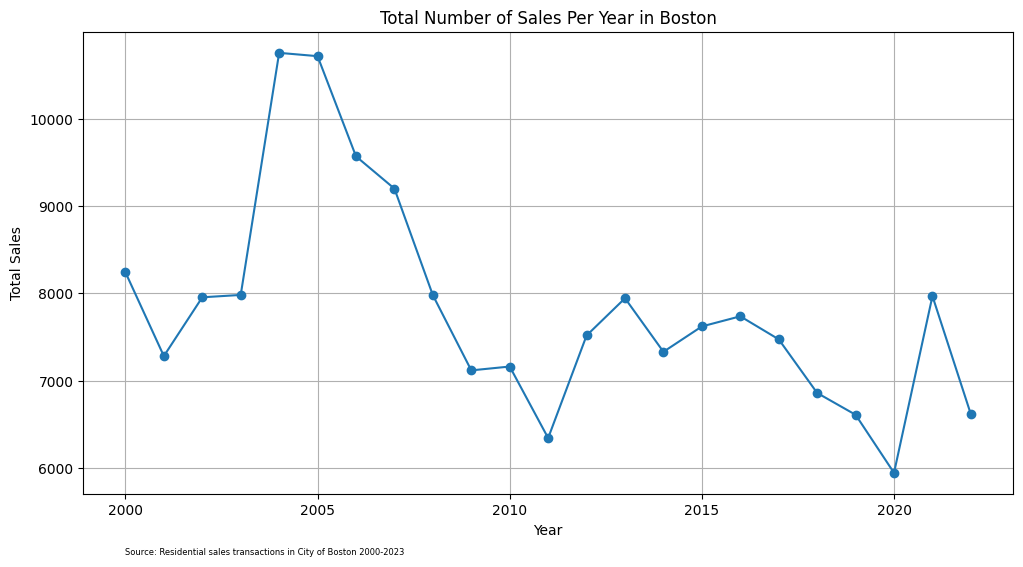

In [5]:
# Load the dataset
#sales_data_path = "boston_residential_sales.csv"  # Update with your file path
#sales_data = pd.read_csv(sales_data_path)

# Group by year and count the number of sales per year
sales_per_year = df.groupby("year").size().reset_index(name="total_sales")

# Create a plot
plt.figure(figsize=(12, 6))
plt.plot(sales_per_year["year"], sales_per_year["total_sales"], marker="o", linestyle="-")

# Customize the plot
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.title("Total Number of Sales Per Year in Boston")
plt.grid(True)

plt.text(2000, 5000, "Source: Residential sales transactions in City of Boston 2000-2023", fontsize=6)


# Show the plot
plt.show()

In [6]:
df.columns

Index(['address', 'street', 'city', 'zip', 'proptype', 'date', 'year', 'price',
       'prsldate', 'prslpr', 'mortgage', 'usecode', 'usage', 'style',
       'yearbuilt', 'totrooms', 'bathrooms', 'bedrooms', 'lotsize', 'intersf',
       'lasqbin', 'amenity', 'lat', 'lon', 'cash_sale', 'buyer_llc_ind',
       'buyer_llp_ind', 'buyer_bus_ind', 'buyer_trst_ind', 'buyer_bnk_ind',
       'buyer_gse_ind', 'buyer_gov_ind', 'seller_llc_ind', 'seller_llp_ind',
       'seller_bus_ind', 'seller_trst_ind', 'seller_bnk_ind', 'seller_gse_ind',
       'seller_gov_ind', 'flip_horizon', 'flip_ind', 'buy_side_flip',
       'sell_side_flip', 'price_diff', 'price_diff_pch', 'month_horizon',
       'flip_term', 'buy_horizon', 'investor_type_purchase_count',
       'investor_type_sale_count', 'investor_type_purchase_llc',
       'investor_type_sale_llc', 'investor_type_purchase_building',
       'investor_type_sale_building', 'avg_annual_value',
       'investor_type_purchase_value', 'investor_type_sale_valu

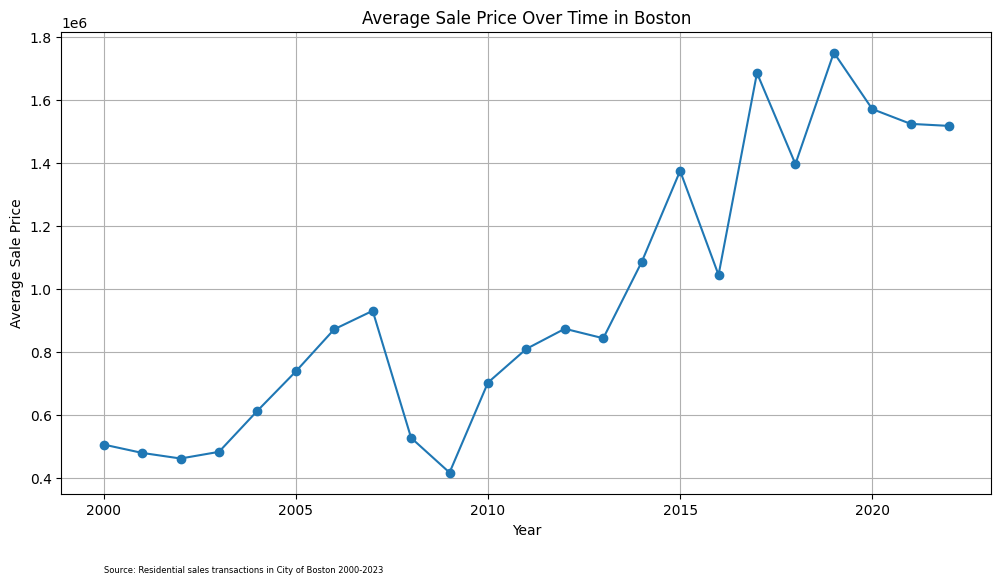

In [7]:
# Calculate average sale price over time
avg_price_per_year = df.groupby("year")["price"].mean().reset_index()

# Count total sales by property type
sales_by_proptype = df["proptype"].value_counts().reset_index()
sales_by_proptype.columns = ["Property Type", "Total Sales"]

# Plot average sale price over time
plt.figure(figsize=(12, 6))
plt.plot(avg_price_per_year["year"], avg_price_per_year["price"], marker="o", linestyle="-")
plt.xlabel("Year")
plt.ylabel("Average Sale Price")
plt.title("Average Sale Price Over Time in Boston")
plt.text(2000, 0.1e6, "Source: Residential sales transactions in City of Boston 2000-2023", fontsize=6)

plt.grid(True)
plt.show()


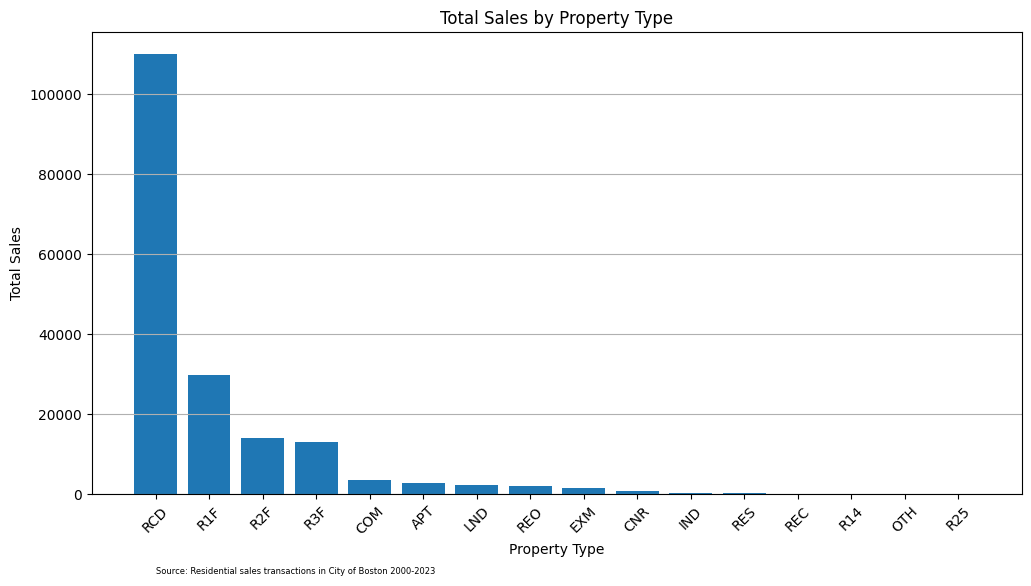

In [8]:

# Plot total sales by property type
plt.figure(figsize=(12, 6))
plt.bar(sales_by_proptype["Property Type"], sales_by_proptype["Total Sales"])
plt.xlabel("Property Type")
plt.ylabel("Total Sales")
plt.title("Total Sales by Property Type")
plt.xticks(rotation=45)
plt.grid(axis="y")
plt.text(0, -20000, "Source: Residential sales transactions in City of Boston 2000-2023", fontsize=6)
plt.show()


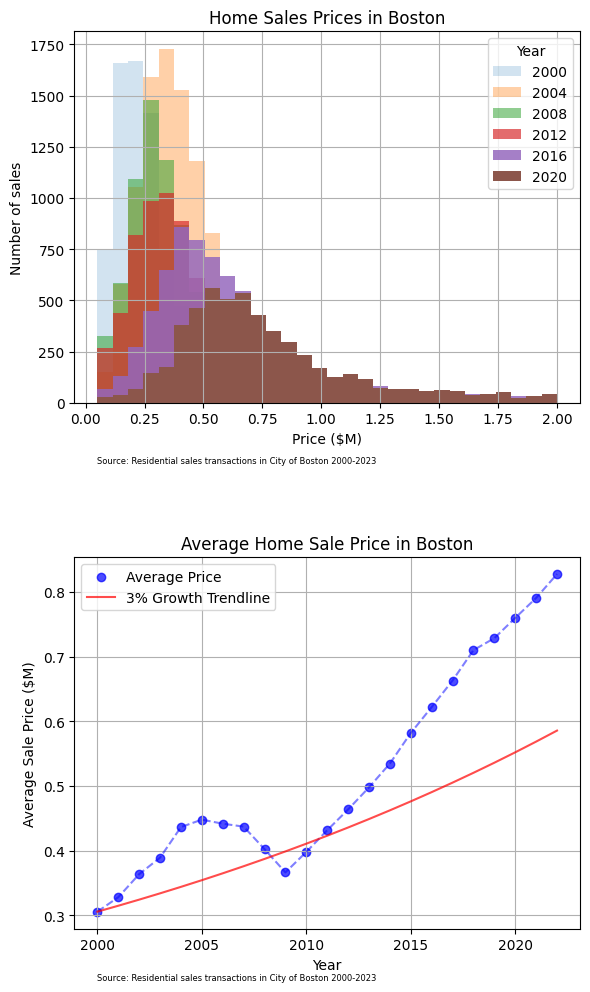

In [54]:
# Convert price values to millions for better readability
df_filtered['price_millions'] = df_filtered['price'] / 1e6
avg_price_per_year['price_millions'] = avg_price_per_year['price'] / 1e6
trendline_millions = trendline / 1e6

# Create a figure with two vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(6, 10))

# Histogram with varying opacity (prices in millions)
for year, alpha in zip(selected_years, alpha_values):
    subset = df_filtered[df_filtered['year'] == year]
    axes[0].hist(subset['price_millions'], bins=30, alpha=alpha, label=str(year))

axes[0].set_xlabel('Price ($M)')
axes[0].set_ylabel('Number of sales')
axes[0].set_title('Home Sales Prices in Boston')
axes[0].legend(title='Year', loc='upper right')
axes[0].grid(True)

# Scatter plot of average price per year with trendline (prices in millions)
axes[1].scatter(avg_price_per_year['year'], avg_price_per_year['price_millions'], color='blue', alpha=0.7, label='Average Price')
axes[1].plot(avg_price_per_year['year'], avg_price_per_year['price_millions'], linestyle='dashed', color='blue', alpha=0.5)
axes[1].plot(years, trendline_millions, linestyle='solid', color='red', label='3% Growth Trendline', alpha=0.7)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Sale Price ($M)')
axes[1].set_title('Average Home Sale Price in Boston')
axes[1].legend()
axes[1].grid(True)

plt.text(2000, 1, "Source: Residential sales transactions in City of Boston 2000-2023", fontsize=6)
plt.text(2000, 0.2, "Source: Residential sales transactions in City of Boston 2000-2023", fontsize=6)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


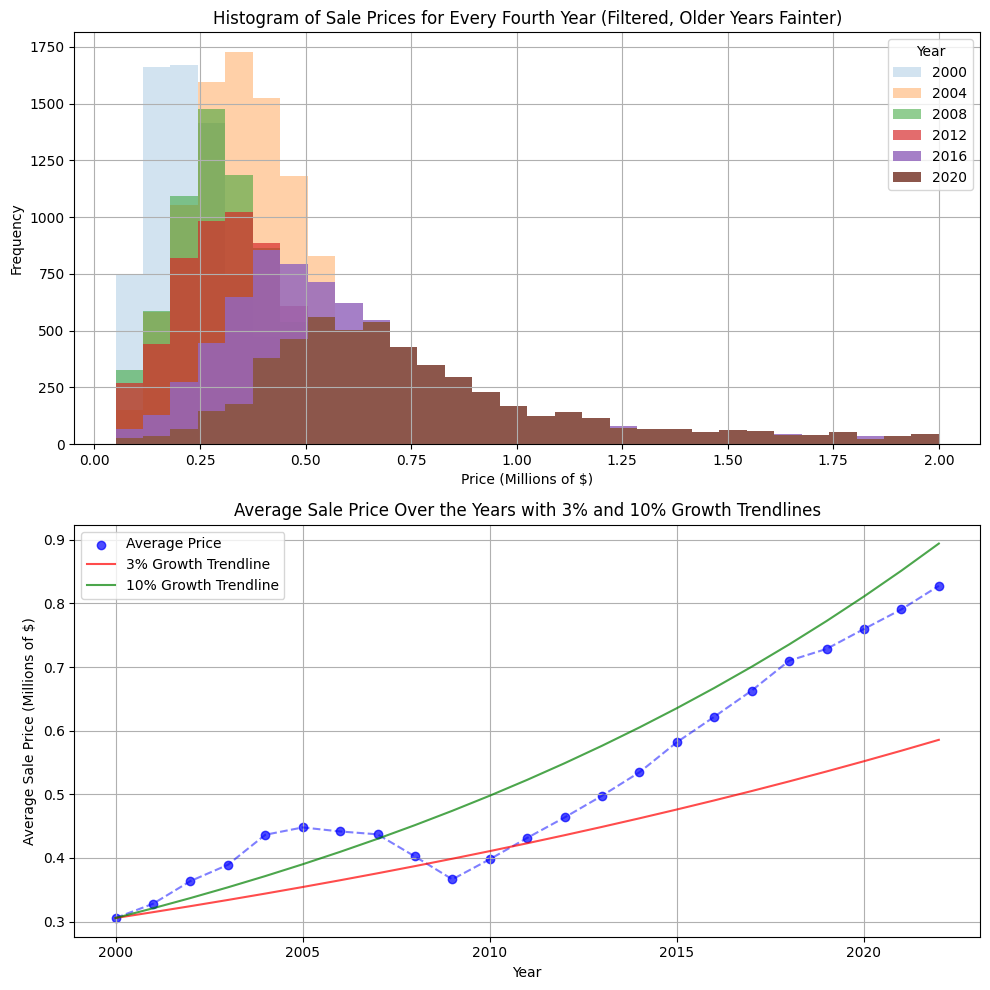

In [51]:
# Compute trendline with 10% growth starting from the first year's average price
trendline_10_percent = initial_price * (1.05 ** (years - years[0])) / 1e6  # Convert to millions

# Create a figure with two vertically stacked subplots
fig, axes = plt.subplots(2, 1, figsize=(10, 10))

# Histogram with varying opacity (prices in millions)
for year, alpha in zip(selected_years, alpha_values):
    subset = df_filtered[df_filtered['year'] == year]
    axes[0].hist(subset['price_millions'], bins=30, alpha=alpha, label=str(year))

axes[0].set_xlabel('Price (Millions of $)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram of Sale Prices for Every Fourth Year (Filtered, Older Years Fainter)')
axes[0].legend(title='Year', loc='upper right', frameon=True)  # Move legend inside the plot
axes[0].grid(True)

# Scatter plot of average price per year with trendlines (prices in millions)
axes[1].scatter(avg_price_per_year['year'], avg_price_per_year['price_millions'], color='blue', alpha=0.7, label='Average Price')
axes[1].plot(avg_price_per_year['year'], avg_price_per_year['price_millions'], linestyle='dashed', color='blue', alpha=0.5)
axes[1].plot(years, trendline_millions, linestyle='solid', color='red', label='3% Growth Trendline', alpha=0.7)
axes[1].plot(years, trendline_10_percent, linestyle='solid', color='green', label='10% Growth Trendline', alpha=0.7)
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Average Sale Price (Millions of $)')
axes[1].set_title('Average Sale Price Over the Years with 3% and 10% Growth Trendlines')
axes[1].legend(loc='upper left', frameon=True)  # Move legend inside the plot
axes[1].grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
